In [11]:
#EJERCICIO 8
#Diseña un modelo en Keras que utilice capas densas, LSTM, GRU, y convolucionales para
#predecir los valores de cierre facebook utilizando como entrada los valores de apertura de los
#datos facebook, apple y google de los 10 días anteriores.

In [12]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import shutil
!pip install pydot
!pip install graphviz
import graphviz
import pydot
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, Conv2D, Flatten, Conv1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam

In [13]:
#Descargo los datos
#faceb=pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\\Practica_ignacio_bermejo\\fb.csv', sep=',')
#google=pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\\Practica_ignacio_bermejo\\Kaggle\\googl.csv', sep=',')
#apple = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\\Practica_ignacio_bermejo\\Kaggle\\aapl.csv', sep=',')
faceb=pd.read_csv('fb.csv', sep=',')
google=pd.read_csv('googl.csv', sep=',')
apple=pd.read_csv('aapl.csv', sep=',')
apple

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


In [14]:
#Guardo las entradas que kle vamos a dar que son las aperturas de facebook, google y apple
fb_apertura=faceb['Open']
apple_apertura=apple['Open']
googl_apertura=google['Open']

In [15]:
fb_cierre=faceb['Close']
apple_cierre=apple['Close']
googl_cierre=google['Close']

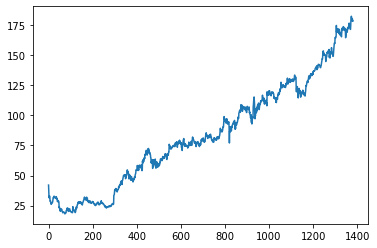

In [16]:
#Veo los graficos
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(fb_apertura)

In [17]:
# Como no coinciden en el tiempo los 3 valores me cojo solo los que coinciden
# Primero me los ordeno teniendo en cuenta la fecha
# Como no coinciden en el tiempo los 3 valores me cojo solo los que coinciden
# Primero me los ordeno teniendo en cuenta la fecha
aa = google['Date'].values
googl_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

###################################
bb = google['Date'].values
googl_indice_cl = np.zeros(aa.shape)
for n_cl in range(0, aa.shape[0]):
    cc_cl = bb[n]
    qq1_cl = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2_cl = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3_cl = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice_cl[n_cl] = (qq1_cl-2000)*365 + qq2_cl*30 + qq3_cl

In [18]:
aa = apple['Date'].values
apple_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    apple_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

######################################################3
bb = apple['Date'].values
apple_indice_cl = np.zeros(aa.shape)
for n_cl in range(0, aa.shape[0]):
    cc_cl = bb[n]
    qq1_cl = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2_cl = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3_cl = np.asarray(cc[8:10], dtype=np.float64, order='C')

    apple_indice_cl[n_cl] = (qq1_cl-2000)*365 + qq2_cl*30 + qq3_cl

In [19]:
aa = faceb['Date'].values
fb_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

#########################################################

bb = faceb['Date'].values
fb_indice_cl = np.zeros(aa.shape)
for n_cl in range(0, aa.shape[0]):
    cc_cl = bb[n]
    qq1_cl = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2_cl = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3_cl = np.asarray(cc[8:10], dtype=np.float64, order='C')

    fb_indice_cl[n_cl] = (qq1_cl-2000)*365 + qq2_cl*30 + qq3_cl

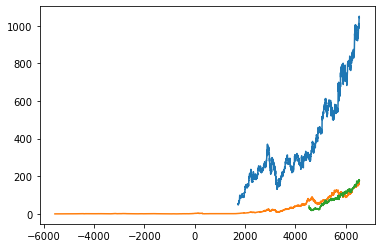

In [20]:
# Los ploteo y veo que hay un tramo en el coinciden las fechas
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(googl_indice,googl_apertura)
plt.plot(apple_indice,apple_apertura)
plt.plot(fb_indice,fb_apertura)

In [21]:
# Me quedo solo las fechas que coinciden
indices = set(googl_indice) & set(apple_indice) & set(fb_indice) 

ii = np.in1d(googl_indice,list(indices))
data_googl = googl_apertura[ii]
ii = np.in1d(apple_indice,list(indices))
data_apple = apple_apertura[ii]
ii = np.in1d(fb_indice,list(indices))
data_fb = fb_apertura[ii]

##########################################################################################

indices_cierre = set(googl_indice_cl) & set(apple_indice_cl) & set(fb_indice_cl) 

ii_cierre = np.in1d(googl_indice_cl,list(indices_cierre))
data_googl_cl = googl_cierre[ii_cierre]
ii_cierre = np.in1d(apple_indice_cl,list(indices_cierre))
data_apple_cl = apple_cierre[ii_cierre]
ii_cierre = np.in1d(fb_indice_cl,list(indices_cierre))
data_fb_cl = fb_cierre[ii_cierre]

In [22]:
# Los coloco todos juntos en un dataset
DATOS = np.zeros((data_googl.shape[0],3))
DATOS[:,0] = data_googl
DATOS[:,1] = data_apple
DATOS[:,2] = data_fb

####################################################

DATOS_CIERRE = np.zeros((data_googl.shape[0],3))
DATOS_CIERRE[:,0] = data_googl
DATOS_CIERRE[:,1] = data_apple
DATOS_CIERRE[:,2] = data_fb

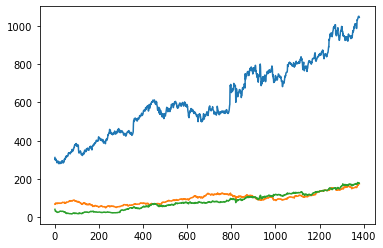

In [23]:
# Los ploteo
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(DATOS[:,0])
plt.plot(DATOS[:,1])
plt.plot(DATOS[:,2])

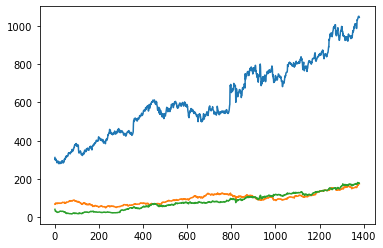

In [24]:
#Grafico los cierres
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(DATOS_CIERRE[:,0])
plt.plot(DATOS_CIERRE[:,1])
plt.plot(DATOS_CIERRE[:,2])

In [25]:
# Reordeno el dataset para hacer bloques de LAG dias
# DATOS ERA ANTES DAT E IBA BIEN PERO AHORA SE HA JODIDO NO SE POR QUE PUTO ULTINMO DIA 
LAG = 10
DATOS_TS = np.zeros((DATOS.shape[0]-LAG,LAG,DATOS.shape[1]))

for ii in range(0,DATOS.shape[0]-LAG):
    DATOS_TS[ii,:,:] = DATOS[ii:ii+LAG,:]

########################################################################

LAG_cl = 10
DATOS_TS_cl = np.zeros((DATOS_CIERRE.shape[0]-LAG_cl,LAG_cl,DATOS_CIERRE.shape[1]))

for ii_cierre in range(0,DATOS_CIERRE.shape[0]-LAG):
    DATOS_TS_cl[ii_cierre,:,:] = DATOS_CIERRE[ii_cierre:ii_cierre+LAG_cl,:]

In [26]:
#Selecciono 9 dias para entrada y el dia 10 de la variable "Y_target" que es lo que se va a predecir
#Separo en train y test
#esto se me jode por    que le paso 3 dimensiones en vez de 2, antes me iba bien k cojones

Ntr = np.floor(DATOS_TS_cl.shape[0]/2)
Y_target = 0

XX_tr = DATOS_TS[range(0,np.int(Ntr)),0:LAG-1,:]
#XX_ts = DATOS_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG-1,:]
XX_ts = DATOS_CIERRE[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG_cl-1,:]

YY_tr = DATOS_TS[range(0,np.int(Ntr)),LAG-1,Y_target]
#YY_ts = DATOS_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG-1,Y_target]
YY_ts = DATOS_CIERRE[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG_cl-1,Y_target]

LAG-1

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
# Definimos un modelo con una capa convolucional 1D y 1 capa densa
model_8 = Sequential()
model_8.add(Conv1D(10, 3, input_shape=XX_tr.shape[1:],padding='same'))
model_8.add(Flatten())
model_8.add(Dense(1))

# mostramos el modelo
model_8.summary()

In [ ]:
# Compilamos el modelo
model_8.compile(optimizer='adam',loss='mae')

In [ ]:
# Entrenamos el modelo, nos guardamos la evolución en 'history' 
# Esto es equivalente a usar callbacks para history
history = model_8.fit(XX_tr, YY_tr, batch_size=32, epochs=300, verbose=1)

In [ ]:
# Mostramos la evolucion del entrenamiento

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(history.history['loss'][0:])

In [ ]:
# Evaluamos el modelo en train
score = model_8.evaluate(XX_tr, YY_tr, verbose=0)
score

In [ ]:
# Predecimos con los datos de train
y_hat = model_8.predict(XX_tr)
np.mean(abs(y_hat[:,0]-YY_tr))

In [ ]:
# Mostramos las predicciones
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(y_hat, label='datos')
plt.plot(YY_tr, label='predicciones')
plt.legend()

In [ ]:
# Predecimos en test
y_hat = model_8.predict(XX_ts)
# mostramos el error
np.mean(abs(y_hat[:,0]-YY_ts))

In [ ]:
# Mostramos las predicciones
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(y_hat, label='datos')
plt.plot(YY_ts, label='predicciones')
plt.legend()

In [ ]:
# Estas son las diferencias
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(y_hat[:,0]-YY_ts, label='NN')
plt.legend()